<div class="alert alert-block alert-info">

- [Import the needed libraries](#2nd-bullet)<br>
- [Import the dataset](#3rd-bullet)<br>
    
- [Filter methods](#6th-bullet)<br>
    - [Univariate variables](#7th-bullet)<br>
    - [Correlation Indices](#8th-bullet)<br>
    - [Chi-Square](#9th-bullet)<br>
- [Wrapper Methods](#10th-bullet)<br>
    - [RFE](#11th-bullet)<br>
        - [RFE Logistic Reg.](#12th-bullet)<br>
        - [RFE XGBoostClassifier.](#12th-bullet)<br>
- [Embedded Methods](#13th-bullet)<br>
    - [Lasso](#14th-bullet)<br>
- [Final Insights](#15th-bullet)<br>
    
</div>

# Chiel make the threshold between 0 and 0.2 dor correlation matrixes

<a class="anchor" id="2nd-bullet">

### Import the needed libraries
    
</a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

# data partition
from sklearn.model_selection import train_test_split


#filter methods
# spearman correlation
import scipy.stats as stats

#wrapper methods

from sklearn.feature_selection import  RFECV
from xgboost import XGBClassifier

# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif, SelectKBest  # mutual information is a embedded method for regression problems

# model assessment
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="3rd-bullet">

### Import the dataset
    
</a>

In [37]:
import pandas as pd

# Import a smaller portion of the data
preproc_train = pd.read_csv('../data/traindf (2).csv') 
preproc_val = pd.read_csv('../data/valdf (2).csv') 
preproc_test = pd.read_csv('../data/testdf (2).csv')

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training data
label_encoder.fit(preproc_train['Claim Injury Type'])

# Copy Claim Injury Type as y variable
y = preproc_train['Claim Injury Type'].copy()
y_val = preproc_val['Claim Injury Type'].copy()

# Drop original column from X
X_preproc_train = preproc_train.drop('Claim Injury Type', axis=1)
X_preproc_val = preproc_val.drop('Claim Injury Type', axis=1)


# Transform the 'Claim Injury Type' column in both training and validation sets
preproc_train['Claim Injury Type'] = label_encoder.transform(preproc_train['Claim Injury Type'])
preproc_val['Claim Injury Type'] = label_encoder.transform(preproc_val['Claim Injury Type'])



In [39]:
y_preproc_train = preproc_train['Claim Injury Type']
X_preproc_train = preproc_train.drop(['Claim Injury Type'], axis=1)

y_preproc_val = preproc_val['Claim Injury Type']
X_preproc_val = preproc_val.drop(['Claim Injury Type'], axis=1)

In [40]:
X_preproc_train.shape, X_preproc_val.shape

((459220, 43), (114805, 43))

In [41]:

# #passar o claim identifier para o index

# y_preproc_train_copy = y_preproc_train.copy()

# y_preproc_train.set_index('Claim Identifier', inplace=True)

# y_preproc_val.set_index('Claim Identifier', inplace=True)

# X_preproc_train.set_index('Claim Identifier', inplace=True)

# preproc_test.set_index('Claim Identifier', inplace=True)

# X_preproc_val.set_index('Claim Identifier', inplace=True)


In [ ]:
We

In [42]:
# drop Accident Month and Accident Day

X_preproc_train.drop(columns=['Accident Month', 'Accident Day'], inplace=True)
X_preproc_val.drop(columns=['Accident Month', 'Accident Day'], inplace=True)
preproc_test.drop(columns=['Accident Month', 'Accident Day'], inplace=True)

In [43]:
col_fill_median = ['Accident Month Cos', 'Accident Month Sin', 'Accident Day Cos', 'Accident Day Sin']

for col in col_fill_median:
    median_value = X_preproc_train[col].median()

    X_preproc_train[col].fillna(median_value, inplace=True)
    X_preproc_val[col].fillna(median_value, inplace=True)
    preproc_test[col].fillna(median_value, inplace=True)



In [44]:
#check for nan values
X_preproc_train.isna().sum().sort_values()

Assembly Date                       0
Above_65                            0
Accident Month Sin                  0
Accident Month Cos                  0
Accident Day Sin                    0
Accident Day Cos                    0
Received_C2                         0
Received_C3                         0
Hearing_held                        0
Attorney/Representative_Y           0
COVID-19 Indicator_Y                0
Alternative Dispute Resolution_Y    0
Gender_M                            0
wcio_pca1                           0
wcio_pca2                           0
region_cluster                      0
high_risk_nature                    0
high_risk_body                      0
Age_41_65                           0
high_risk_cause                     0
Age_21_40                           0
Days_to_Assembly                    0
Average Weekly Wage                 0
Birth Year                          0
C-2 Date                            0
C-3 Date                            0
Carrier Name

<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## Feature Selection
    
</a>
    
</div>

<a class="anchor" id="6th-bullet">

## Filter methods
    
</a>

<a class="anchor" id="7th-bullet">

### Univariate variables
    
</a>

Check if any of the numerical variables is univariate (variance is equal to 0), then drop those variables if any of those exist.

from this we can tell that, there are no categorical features

In [45]:
X_preproc_train.var().sort_values()

Alternative Dispute Resolution_Y    0.004483
Under_20                            0.015444
Received_C2                         0.024602
Days_to_Assembly                    0.029170
Above_65                            0.036877
Agreement Reached                   0.044311
COVID-19 Indicator_Y                0.045801
high_risk_body                      0.047649
high_risk_cause                     0.101894
high_risk_nature                    0.116881
market_indicator                    0.143677
Hearing_held                        0.193621
Attorney/Representative_Y           0.216414
Received_C3                         0.219666
Gender_M                            0.242912
Age_21_40                           0.244430
Age_41_65                           0.250000
Accident Month Cos                  0.993560
Accident Month Sin                  0.993560
Accident Day Cos                    0.993568
Accident Day Sin                    0.993653
Accident Year                       1.000002
IME-4 Coun

No feature to be dropped from this one

In [46]:
X_preproc_train

,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,...,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M,wcio_pca1,wcio_pca2,region_cluster,high_risk_nature,high_risk_body,high_risk_cause,market_indicator
0,-0.067360,1.213328,-0.495974,-0.064860,-1.263841,-0.575548,0.983139,1.274579,1.046863,-0.037533,...,0,0,0,0.610477,0.806579,0.162263,1,0,0,1
1,-0.908646,1.344678,0.955044,-0.783603,0.558209,-0.494377,-0.780636,0.384500,1.046863,-1.477658,...,0,0,0,-0.175047,0.713979,0.277415,0,0,1,1
2,1.012027,-0.755254,-0.133220,0.864313,0.558209,-0.209935,0.983139,1.040655,1.046863,-0.037533,...,0,0,1,-0.025755,0.530618,1.125027,0,0,0,0
3,0.056452,-0.755254,1.317798,0.041721,0.558209,-0.625062,-1.524399,1.040655,1.046863,-0.037533,...,0,0,1,-0.467459,-0.375868,-0.223555,0,0,0,0
4,-0.788009,0.889468,0.156984,-0.698884,-1.896900,-0.453747,-1.524399,0.574898,1.046863,-1.413414,...,0,0,1,0.104639,0.995235,0.774823,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459215,-0.289586,1.366290,1.245247,-0.256161,-1.495213,-0.411805,0.983139,-0.275417,1.046863,0.396110,...,0,0,1,-1.723148,0.040346,-0.501344,0,0,0,0
459216,-0.048312,1.291941,-0.858729,-0.048463,-1.228493,-0.617431,0.983139,1.274579,1.046863,0.171258,...,0,0,1,0.831661,-1.053625,0.002000,0,0,0,0
459217,-0.534036,1.232673,-1.003831,-0.466591,0.558209,-0.618653,0.983139,-0.035105,-1.041200,-0.037533,...,0,0,0,1.045677,1.490061,-0.052608,0,0,0,0
459218,1.069171,-0.755254,1.172696,0.913504,0.558209,-0.322674,0.983139,1.040655,1.046863,-0.037533,...,0,0,1,0.964689,-0.990343,1.342272,0,0,0,0


<a class="anchor" id="8th-bullet">

### Spearman Correlation
    
</a>

In [47]:
X_preproc_train.head()



,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,...,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M,wcio_pca1,wcio_pca2,region_cluster,high_risk_nature,high_risk_body,high_risk_cause,market_indicator
0,-0.067360,1.213328,-0.495974,-0.064860,-1.263841,-0.575548,0.983139,1.274579,1.046863,-0.037533,...,0,0,0,0.610477,0.806579,0.162263,1,0,0,1
1,-0.908646,1.344678,0.955044,-0.783603,0.558209,-0.494377,-0.780636,0.384500,1.046863,-1.477658,...,0,0,0,-0.175047,0.713979,0.277415,0,0,1,1
2,1.012027,-0.755254,-0.133220,0.864313,0.558209,-0.209935,0.983139,1.040655,1.046863,-0.037533,...,0,0,1,-0.025755,0.530618,1.125027,0,0,0,0
3,0.056452,-0.755254,1.317798,0.041721,0.558209,-0.625062,-1.524399,1.040655,1.046863,-0.037533,...,0,0,1,-0.467459,-0.375868,-0.223555,0,0,0,0
4,-0.788009,0.889468,0.156984,-0.698884,-1.896900,-0.453747,-1.524399,0.574898,1.046863,-1.413414,...,0,0,1,0.104639,0.995235,0.774823,0,0,0,0


### Dropping Binary and Cyclic Encoded Features

In [48]:
#drop binary columns
continuous_features = X_preproc_train.drop(columns=['COVID-19 Indicator_Y', 'Alternative Dispute Resolution_Y', 'Gender_M', 'high_risk_nature', 'Received_C2','Under_20', 'Age_21_40', 'Age_41_65', 'Age_41_65','Received_C3', 'Hearing_held', 'Attorney/Representative_Y', 'high_risk_body', 'high_risk_cause', 'market_indicator', 'Agreement Reached', 'Days_to_Assembly', "Accident Day Cos", 'Accident Day Sin', 'Accident Month Cos', 'Accident Month Sin'])

In [49]:
# round to 1 decimal places
continuous_features = continuous_features.round(1)
def cor_heatmap(cor):
    plt.figure(figsize=(24,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.2f')
    plt.show()

In [50]:

cor_spearman = continuous_features.corr(method ='spearman')
cor_spearman

,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,...,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Accident Year,Above_65,wcio_pca1,wcio_pca2,region_cluster
Assembly Date,1.000000,0.035011,-0.079147,0.973649,0.100434,0.023874,-0.030656,-0.004726,-0.006443,0.384974,...,0.042801,0.017750,-0.028987,-0.086318,-0.000017,-0.903872,-0.005361,-0.052774,-0.085729,-0.006875
Average Weekly Wage,0.035011,1.000000,-0.108808,0.013797,-0.398465,0.130524,-0.079759,0.076999,0.055514,-0.001769,...,0.057416,0.063267,0.104584,0.106551,0.002350,-0.010892,-0.001526,0.142490,0.034329,0.015342
Birth Year,-0.079147,-0.108808,1.000000,-0.081746,0.099392,0.015035,0.042513,-0.026018,-0.014037,-0.030123,...,-0.056141,-0.054275,-0.028695,-0.012119,-0.001730,0.091822,-0.331431,-0.052017,0.025818,0.003402
C-2 Date,0.973649,0.013797,-0.081746,1.000000,0.119093,0.011265,-0.025291,-0.016145,-0.019271,0.379893,...,0.029207,0.017551,-0.034157,-0.086875,0.000216,-0.891941,-0.004420,-0.058984,-0.086103,-0.013684
C-3 Date,0.100434,-0.398465,0.099392,0.119093,1.000000,-0.094803,0.079554,-0.141951,-0.140668,0.074283,...,-0.002201,-0.028517,-0.024602,-0.072086,0.001693,-0.083497,-0.005041,-0.057289,-0.041873,-0.063481
Carrier Name,0.023874,0.130524,0.015035,0.011265,-0.094803,1.000000,-0.278441,0.026423,0.080098,0.005318,...,0.129221,0.048824,0.073623,0.034938,-0.001259,-0.018869,-0.021592,0.083948,-0.008677,0.030221
Carrier Type,-0.030656,-0.079759,0.042513,-0.025291,0.079554,-0.278441,1.000000,0.038734,0.023056,-0.000982,...,-0.259938,-0.053993,-0.071361,-0.035727,0.000588,0.027850,0.014136,-0.073672,0.001656,0.008415
County of Injury,-0.004726,0.076999,-0.026018,-0.016145,-0.141951,0.026423,0.038734,1.000000,0.428727,0.022076,...,0.019961,-0.002912,-0.028330,-0.015361,0.000722,-0.003078,0.006155,-0.027741,-0.008117,0.432325
District Name,-0.006443,0.055514,-0.014037,-0.019271,-0.140668,0.080098,0.023056,0.428727,1.000000,0.008002,...,0.063421,0.003249,-0.026847,-0.009736,-0.000982,0.000528,-0.005756,-0.021654,-0.006279,0.271876
First Hearing Date,0.384974,-0.001769,-0.030123,0.379893,0.074283,0.005318,-0.000982,0.022076,0.008002,1.000000,...,0.007157,0.004742,-0.039375,-0.069537,-0.001528,-0.366667,0.002301,-0.054721,-0.062347,0.005914


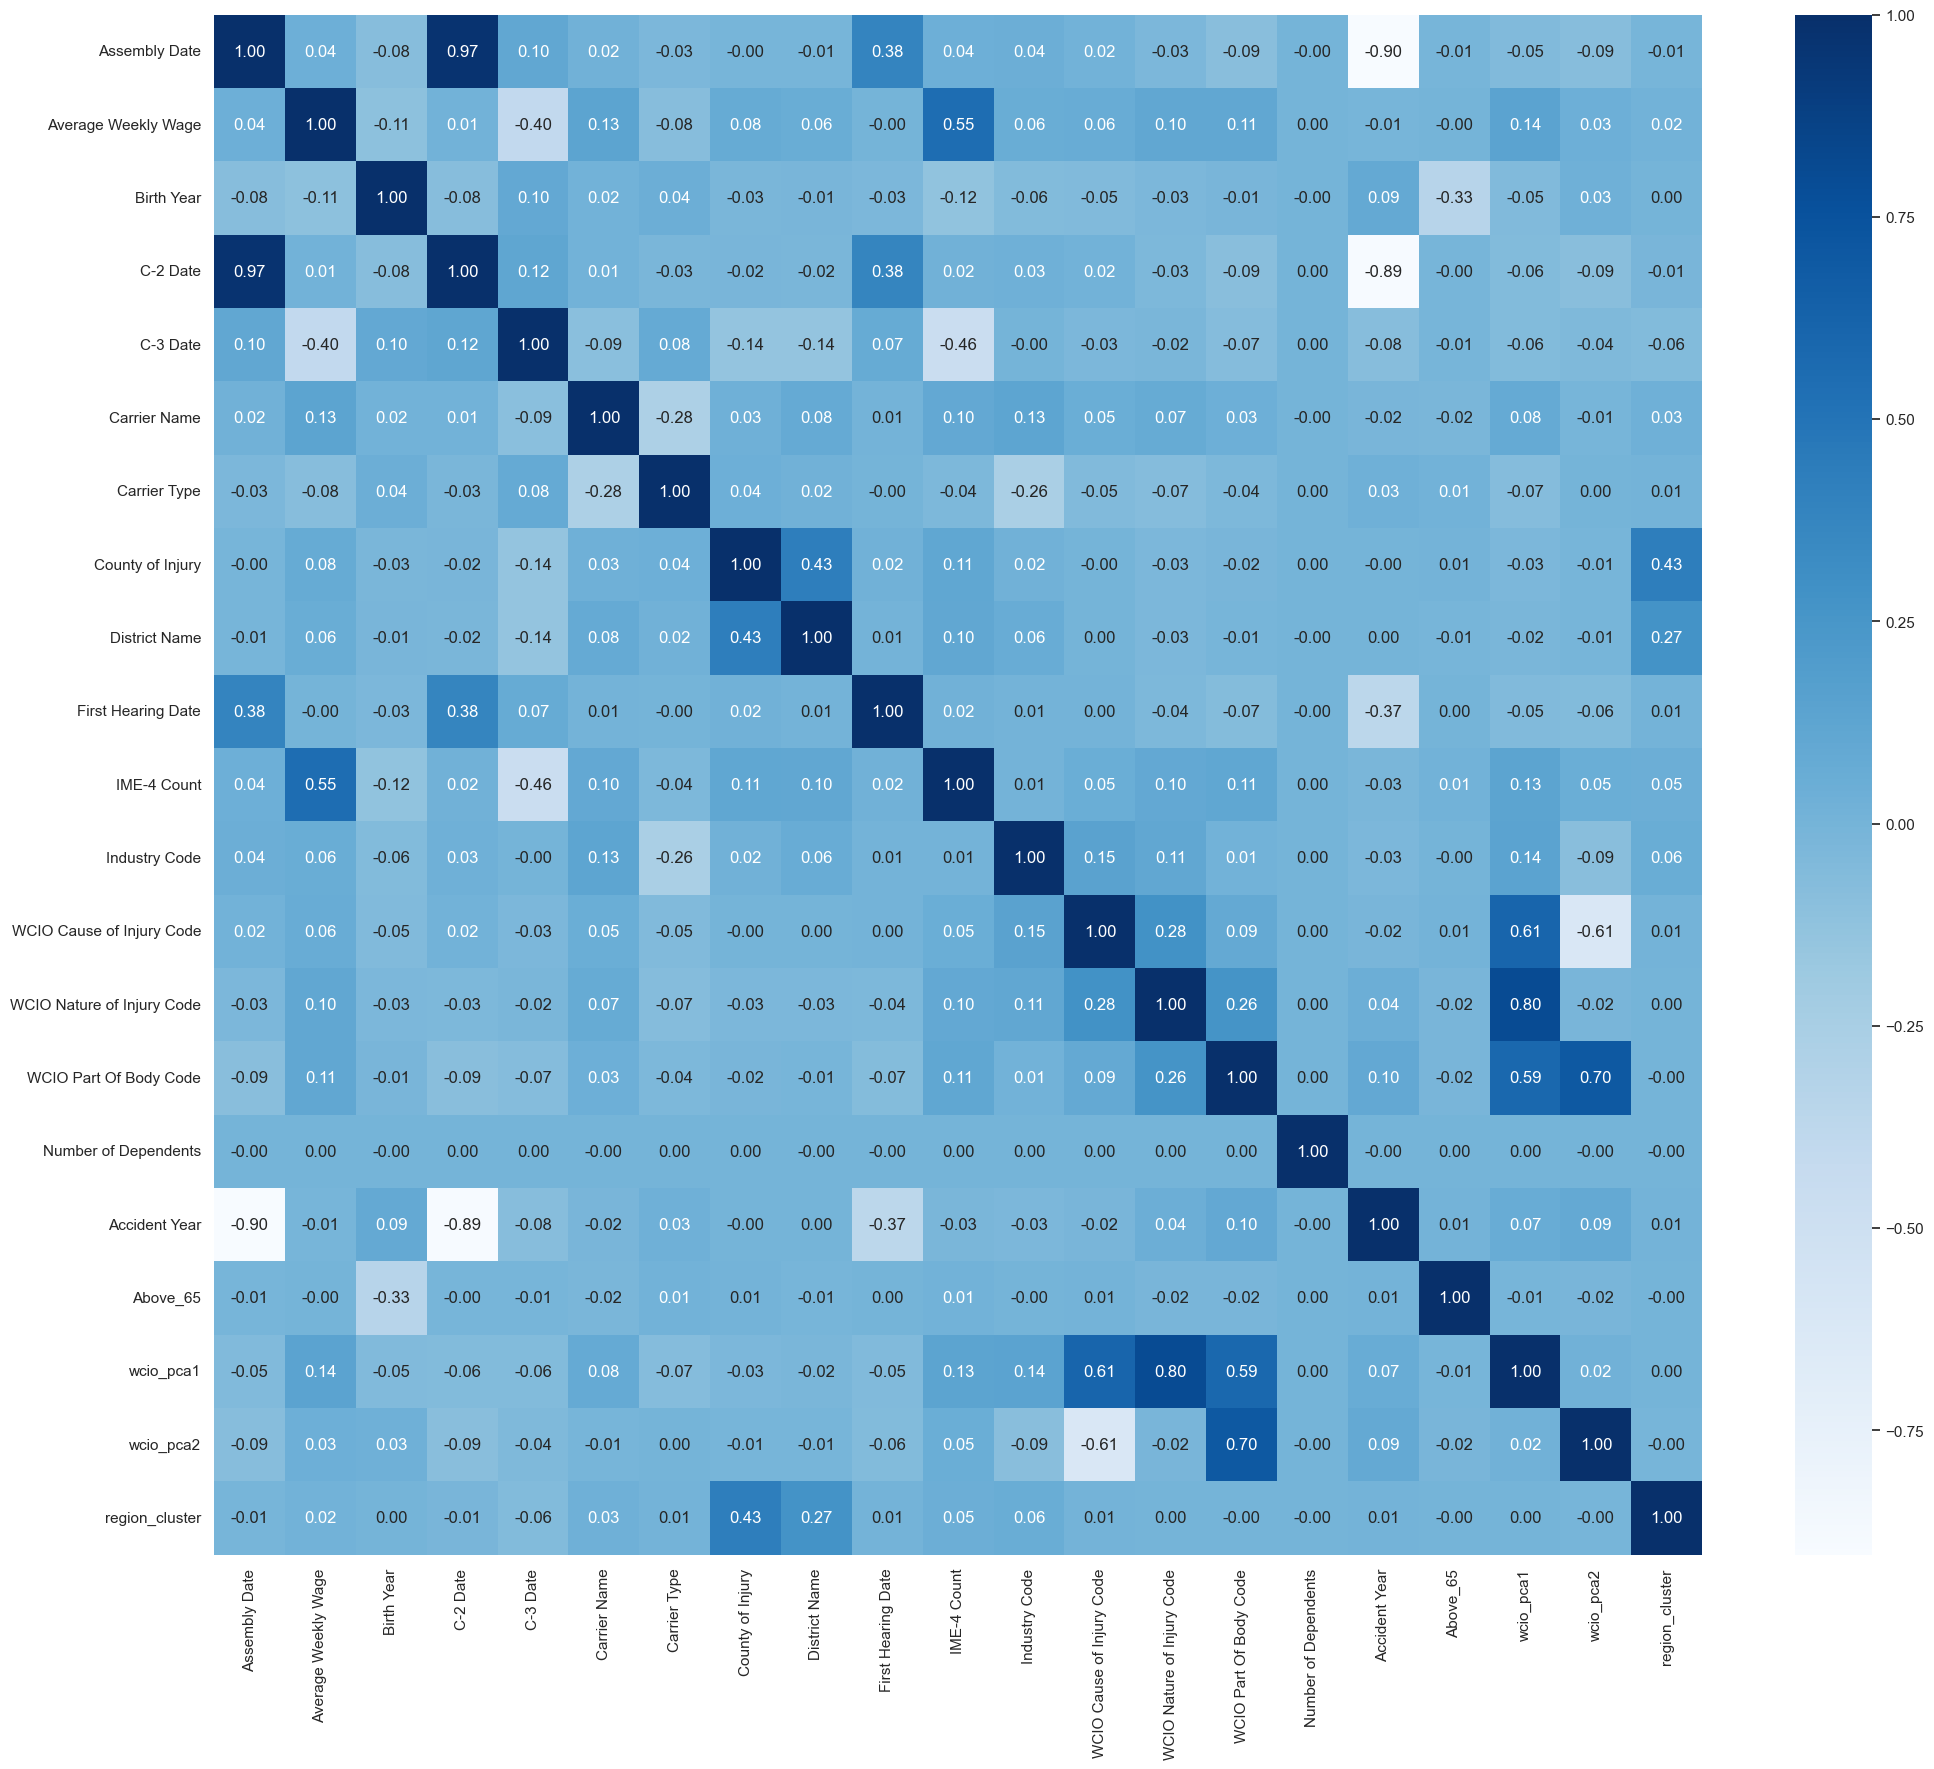

In [51]:
cor_heatmap(cor_spearman)

# cor_spearman = continuous_features.corr(method='spearman')

# # Filter the correlation matrix
# filtered_cor = cor_spearman[
#             (cor_spearman > 0.8)
# ]

# # Remove diagonal part
# filtered_cor = filtered_cor.mask(np.equal(*np.indices(filtered_cor.shape)))

# # Stack the filtered correlation matrix and reset the index
# stacked_cor = filtered_cor.stack().reset_index()

# # Filter out NaN values and correlations equal to 1
# filtered_stacked_cor = stacked_cor[
#     stacked_cor[0].notnull() & (stacked_cor[0] != 1)
# ]

# # Print the features and their correlation values with messages
# for index, row in filtered_stacked_cor.iterrows():
#     feature1 = row['level_0']
#     feature2 = row['level_1']
#     correlation = row[0]

#     if correlation > 0.79:
#         print(f"Correlation between {feature1} and {feature2} is above 0.8: {correlation:.2f}")

#     elif correlation < 0.2 and correlation > 0:
#         print(f"Correlation between {feature1} and {feature2} is below 0.2: {correlation:.2f}")



We will assume that the Thresholds for feature relevance is 0.2 and redundance for 0,8


### Redundancy
drop 'wcio_pca1' or 'WCIO Nature of Injury Code'

drop 'c2 date' or 'Assembly date'


### Relevance

Drop Number of depndents

Drop Industry code

Drop Birth Year






<a class="anchor" id="15th-bullet">

### Mutual Information Classification
    https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.SelectKBest.html
    https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_regression.html
</a>

In [52]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(12,8))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

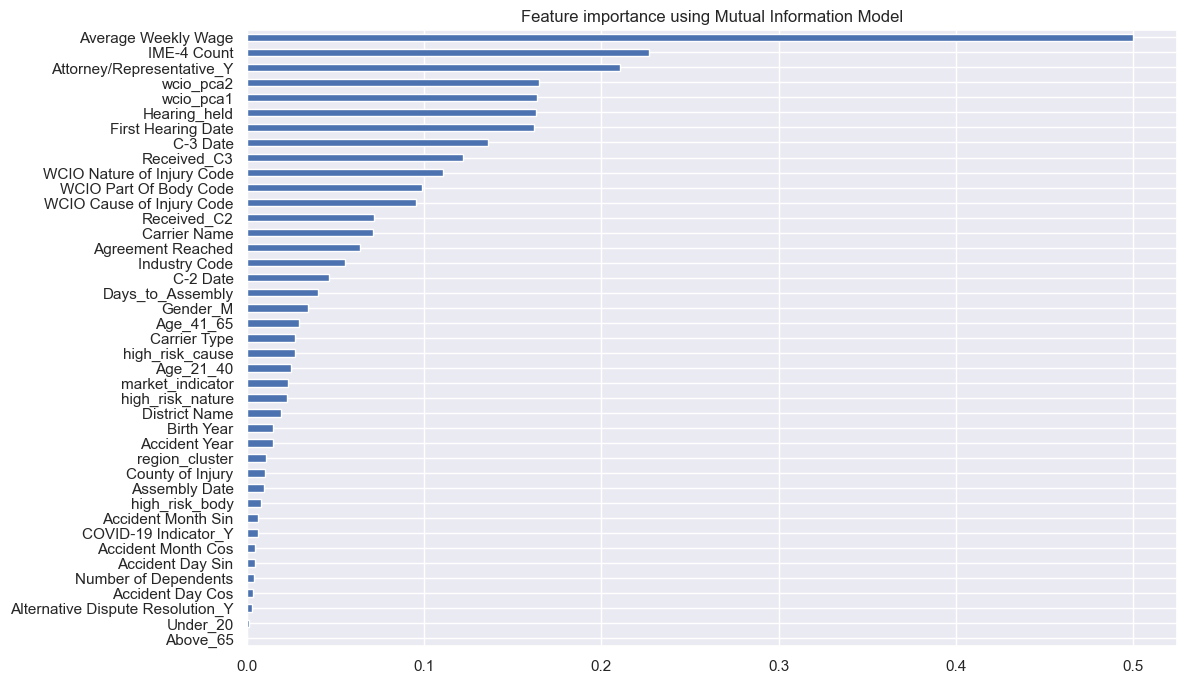

18Features to be eliminated:
Features to be eliminated: 
Index(['Assembly Date', 'Birth Year', 'County of Injury', 'District Name',
       'Number of Dependents', 'Accident Year', 'Under_20', 'Above_65',
       'Accident Month Sin', 'Accident Month Cos', 'Accident Day Sin',
       'Accident Day Cos', 'COVID-19 Indicator_Y',
       'Alternative Dispute Resolution_Y', 'region_cluster',
       'high_risk_nature', 'high_risk_body', 'market_indicator'],
      dtype='object')
Feature                        Score     
----------------------------------------
Assembly Date                  0.0097    
Average Weekly Wage            0.4995    
Birth Year                     0.0149    
C-2 Date                       0.0464    
C-3 Date                       0.1360    
Carrier Name                   0.0712    
Carrier Type                   0.0271    
County of Injury               0.0105    
District Name                  0.0191    
First Hearing Date             0.1621    
IME-4 Count           

In [53]:
#  Mutual Information Regression for feature selection in regression problems
mic = SelectKBest(score_func= mutual_info_classif, k= 'all')

# fit the model to the training data
mic.fit(X_preproc_train, y_preproc_train)

# get the scores of the features
mic_scores = pd.Series(mic.scores_, index = X_preproc_train.columns)

# plot the scores
plot_importance(mic_scores,'Mutual Information')
mic_scores.sort_values()

#print the features that were eliminated

eliminated_features = mic_scores[mic_scores <= 0.0243].index
print(f"{len(eliminated_features)}Features to be eliminated:")
print(f"Features to be eliminated: \n{eliminated_features}")
# Print formatted table
print(f"{'Feature':<30} {'Score':<10}")
print("-" * 40)
for feature, score in mic_scores.items():
    print(f"{feature:<30} {score:<10.4f}")
    


   
### Dropping the ones with importance lower than their supposed contribution : 



# VIF Variance Information Factor


Strict threshold (5):
Features to drop: 7
Features: ['Age_41_65', 'Age_21_40', 'market_indicator', 'high_risk_nature', 'high_risk_cause', 'COVID-19 Indicator_Y', 'Received_C3']

Moderate threshold (10):
Features to drop: 3
Features: ['Age_41_65', 'Age_21_40', 'market_indicator']

Lenient threshold (20):
Features to drop: 0
Features: []


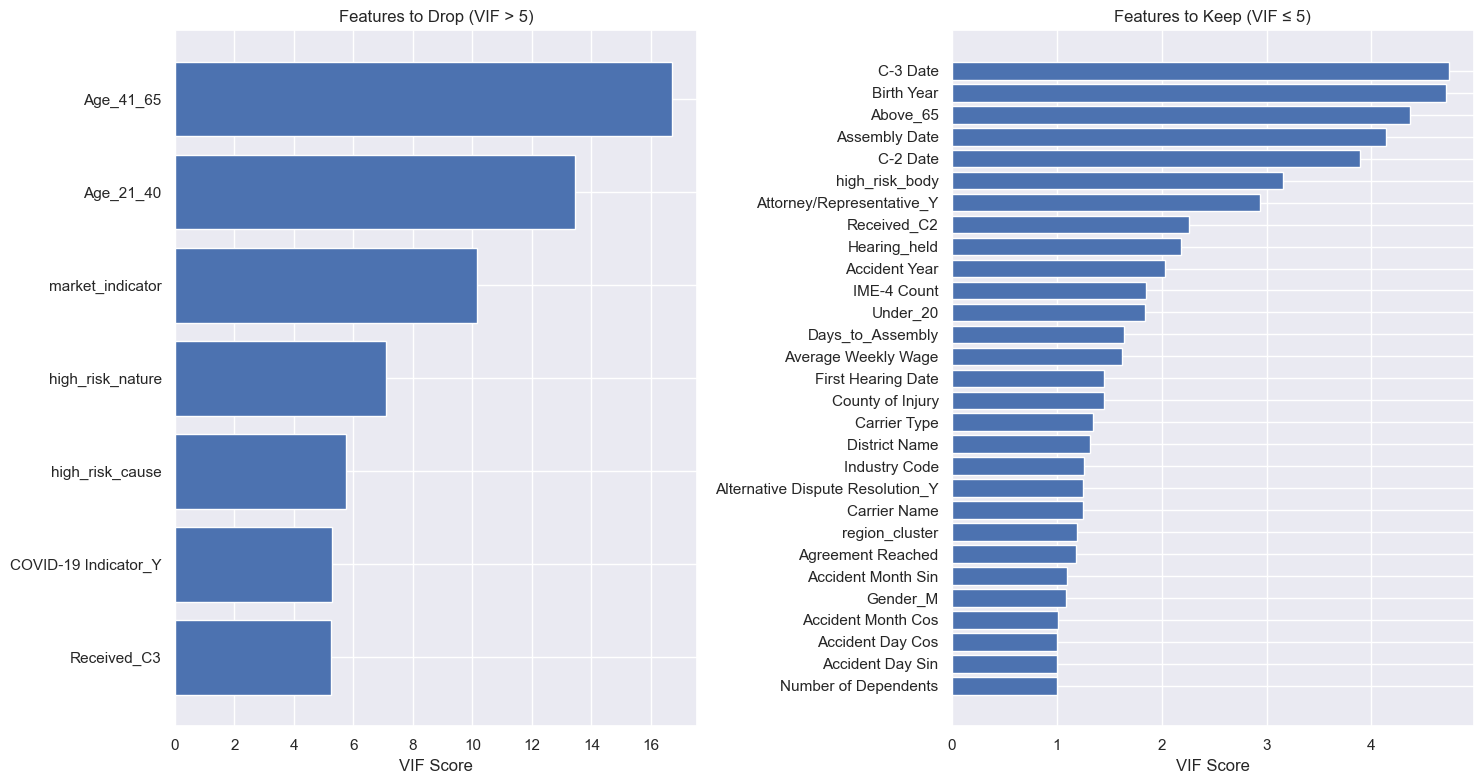

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_vif(X):
   vif_data = pd.DataFrame()
   vif_data["Feature"] = X_preproc_train.columns
   vif_data["VIF"] = [_calculate_vif(X, i) for i in range(X_preproc_train.shape[1])]
   return vif_data.sort_values('VIF', ascending=False)

def _calculate_vif(X, i):
   y = X.iloc[:, i]
   X_other = X_preproc_train.drop(X.columns[i], axis=1)
   model = LinearRegression()
   model.fit(X_other, y)
   r_squared = model.score(X_other, y)
   if r_squared == 1:
       return float('inf')
   return 1 / (1 - r_squared)

# Calculate VIF
vif_df = calculate_vif(X_preproc_train)

# Common thresholds
vif_thresholds = {
    'strict': 5,    # Remove VIF > 5
    'moderate': 10, # Remove VIF > 10
    'lenient': 20   # Remove VIF > 20
}

# Get features to drop
def get_vif_features(vif_df, threshold):
    return vif_df[vif_df['VIF'] > threshold]['Feature'].tolist()

# Remove infinite VIFs first
features_to_drop = vif_df[vif_df['VIF'].isin([float('inf')])]['Feature'].tolist()

# Print features to drop at each threshold
for name, threshold in vif_thresholds.items():
    features = get_vif_features(vif_df[vif_df['VIF'] != float('inf')], threshold)
    print(f"\n{name.title()} threshold ({threshold}):")
    print(f"Features to drop: {len(features)}")
    print(f"Features: {features}")

# Get all features with finite VIF scores, sorted
vif_df_finite = vif_df[vif_df['VIF'] != float('inf')].sort_values('VIF', ascending=True)

# Features to drop (VIF > 5)
features_to_drop = get_vif_features(vif_df_finite, 5)

# Features to keep (VIF <= 5)
features_to_keep = vif_df_finite[vif_df_finite['VIF'] <= 5]['Feature'].tolist()

# Save both lists to CSV
pd.DataFrame({
   'features_to_drop': pd.Series(features_to_drop),
   'features_to_keep': pd.Series(features_to_keep)
}).to_csv('fs1.csv', index=False)

import matplotlib.pyplot as plt

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot features to drop
vif_drop = vif_df_finite[vif_df_finite['VIF'] > 5]
ax1.barh(vif_drop['Feature'], vif_drop['VIF'])
ax1.set_title('Features to Drop (VIF > 5)')
ax1.set_xlabel('VIF Score')

# Plot features to keep
vif_keep = vif_df_finite[vif_df_finite['VIF'] <= 5]
ax2.barh(vif_keep['Feature'], vif_keep['VIF'])
ax2.set_title('Features to Keep (VIF ≤ 5)')
ax2.set_xlabel('VIF Score')

plt.tight_layout()
plt.show()

<a class="anchor" id="11th-bullet">

## Wrapper Methods
    
</a>

<a class="anchor" id="12th-bullet">

### RFE
    
</a>

<a class="anchor" id="13th-bullet">

#### RFE XGBoosting

</a>

Using RFE, the objective is finding the optimal number of features to select

### RFE XGBoosting

In [ ]:
#number of features
nof_list= np.arange(1, 42)
high_score=0

#Variable to store the optimum features
nof=0
train_f1score_list =[]
val_f1score_list = []

for n in range(len(nof_list)):

    #using XGBoost
    model = XGBClassifier(
            objective='multi:softprob',
            random_state=42,
            learning_rate=0.05046195857265063,
            max_depth=14,
            min_child_weight=4.295663382738008,
            subsample=0.5794673021390964,
            colsample_bytree=0.6752893520492427,
            n_estimators=716,
            reg_alpha=0.2207882375290882,
            reg_lambda=0.28791727579162424,
            gamma=1.5556906330098323,
)

    rfe = RFECV(estimator = model,min_features_to_select = nof_list[n], step=1, cv=5)
    X_train_rfe = rfe.fit_transform(X_preproc_train,y_preproc_train)
    X_val_rfe = rfe.transform(X_preproc_val)

    model.fit(X_train_rfe,y_preproc_train)

    # Predictions for F1 score
    y_preproc_train_pred = model.predict(X_train_rfe)
    y_preproc_val_pred = model.predict(X_val_rfe)

    #storing results on training data
    train_f1score = f1_score(y_preproc_train,y_preproc_train_pred, average='macro')
    train_f1score_list.append(train_f1score)

    #storing results on training data
    val_f1score = f1_score(y_preproc_val,y_preproc_val_pred, average='macro')
    val_f1score_list.append(val_f1score)

    #check best score
    if(val_f1score >= high_score):
        high_score = val_f1score
        nof = nof_list[n]
        features_to_select = pd.Series(rfe.support_, index = X_preproc_train.columns)


print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")


## IG Score

In [69]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt



def compute_importance_scores(model, X, y, n_repeats=10):
   result = permutation_importance(
       model, X, y,
       n_repeats=n_repeats,
       random_state=42,
       n_jobs=-1
   )

   importances = pd.DataFrame(
       {'Feature': X_preproc_train.columns,
        'Importance': result.importances_mean,
        'Std': result.importances_std}
   )
   return importances.sort_values('Importance', ascending=False)

# Calculate importance
ig_scores = compute_importance_scores(model, X_preproc_train, y_preproc_train)

# Plot
plt.figure(figsize=(12, 8))
plt.errorbar(
   ig_scores['Importance'],
   np.arange(len(ig_scores)),
   xerr=ig_scores['Std'],
   fmt='o'
)
plt.yticks(np.arange(len(ig_scores)), ig_scores['Feature'])
plt.xlabel('Feature Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Save results
ig_scores.to_csv('ig_scores.csv', index=False)

## Boruta was handled in Boruta_XGB_+_Permute_test.ipynb
<a>C:\Users\HP\Documents\GitHub\ML_2.0\Boruta_XGB_+_Permute_test.ipynb
</a>


<a class="anchor" id="13th-bullet">

## Embedded Methods
    
</a>

<a class="anchor" id="14th-bullet">

### Lasso Regression
    
</a>

In [23]:
reg = LassoCV(cv=5, random_state=42)

reg.fit(X_preproc_train, y_preproc_train)

coef = pd.Series(reg.coef_, index = X_preproc_train.columns)
coef.sort_values()

high_risk_cause                    -0.101294
Accident Year                      -0.041696
District Name                      -0.039443
high_risk_nature                   -0.036231
Assembly Date                      -0.010846
Carrier Type                       -0.007567
Birth Year                         -0.004992
Accident Month Cos                 -0.003828
First Hearing Date                 -0.003057
County of Injury                   -0.002678
region_cluster                     -0.001213
Accident Day Sin                   -0.000531
wcio_pca2                           0.000000
Under_20                            0.000000
COVID-19 Indicator_Y                0.000000
Age_41_65                          -0.000000
high_risk_body                     -0.000000
market_indicator                   -0.000000
WCIO Nature of Injury Code          0.000000
Carrier Name                       -0.000000
Number of Dependents               -0.000000
Accident Day Cos                    0.000787
WCIO Cause

Lasso picked 32 variables and eliminated the other 9 variables
Features eliminated: 
Carrier Name                 -0.0
WCIO Nature of Injury Code    0.0
Number of Dependents         -0.0
Under_20                      0.0
Age_41_65                    -0.0
COVID-19 Indicator_Y          0.0
wcio_pca2                     0.0
high_risk_body               -0.0
market_indicator             -0.0
dtype: float64


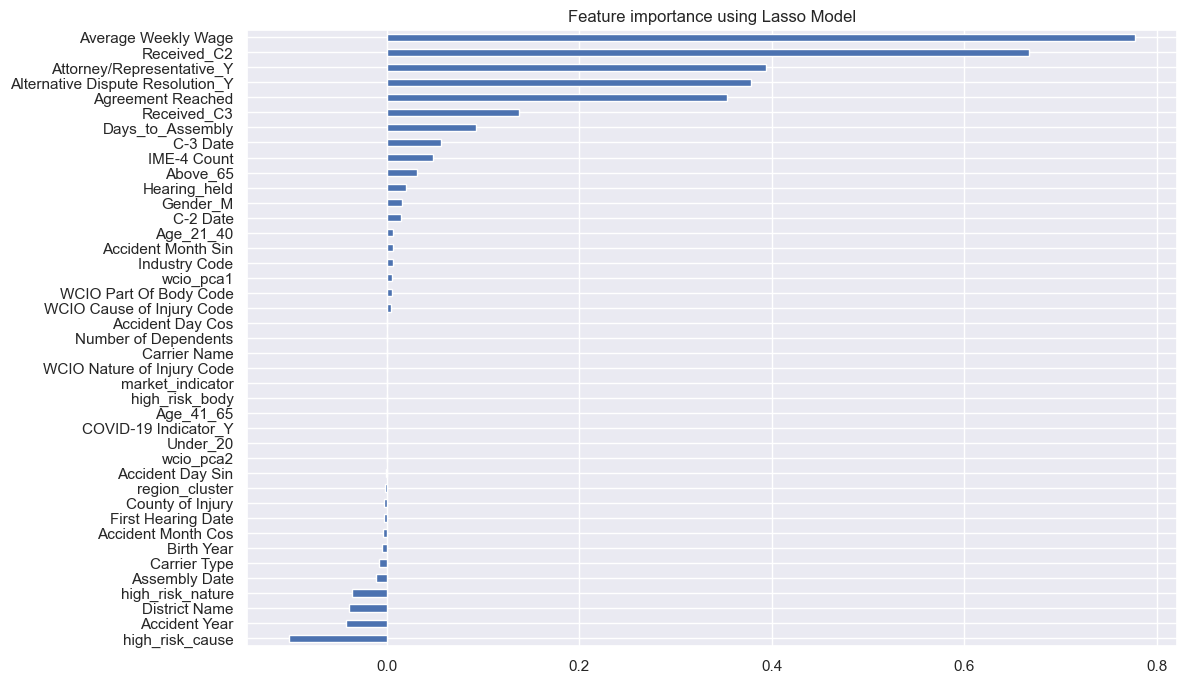

In [34]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#print the features that were eliminated

features_eliminated = coef[coef == 0]
print(f"Features eliminated: \n{features_eliminated.sort_values()}")

plot_importance(coef,'Lasso')

In [ ]:
X_preproc_train

<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>


| Predictor | Unvariate|  Spearman | Variance information factor (VIF)| (IG)Information Gain | BORUTA| RFE XGB | Lasso | Mutual Information Class. | What to do? |
| --- | --- | --- | --- |--- |---|---|---|---| ---|
| Assembly Date | Keep | Drop? | Drop |---|--- |---| Drop |Drop| ---|
| Average Weekly Wage | Keep | Keep | Keep |---|--- |---| Keep | Keep | ---|
| Birth Year | Keep | Drop | Keep |--- |---|---| Keep | Drop | ---|
| C-2 Date | Keep | Drop? | Drop |--- |---|---| Keep | Drop | ---|
| C-3 Date | Keep | Keep | Drop |--- |---|---| Drop | Keep | ---|
| Carrier Name | Keep | Keep | Keep |--- |---|---| Keep | Keep | ---|
| Carrier Type | Keep | Keep | Keep |--- |---|---| Keep | Drop | ---|
| County of Injury | Keep | Keep | Keep |--- |---|---| Keep | Drop | ---|
| District Name | Keep | Keep | Keep |--- |---|---| Keep | Drop | ---|
| First Hearing Date | Keep | Keep | Keep |--- |---|---| Keep | Keep | ---|
| IME-4 Count | Keep | Keep | Keep |--- |---|---| Keep | Keep | ---|
| Industry Code | Keep | Drop | Keep |--- |---|---| Keep | Keep | ---|
| WCIO Cause of Injury Code | Keep | Keep | Keep |--- |---|---| Drop | Keep | ---|
| WCIO Nature of Injury Code | Keep | Drop? | Keep |--- |---|---| Drop | Keep | ---|
| WCIO Part Of Body Code | Keep | Keep | Keep |--- |---|---| Keep | Keep | ---|
| Agreement Reached | Keep | --- | Keep |--- |---|---|Keep| Keep | ---|
| Number of Dependents | Keep | Drop | Keep |---|---|---| Keep | Drop | ---|
| Accident Year | Keep | Keep | Keep |--- |---|---|Keep| Drop | ---|
| Received_C2 | Keep | --- | Keep |--- |---|---| Keep | Drop | ---|
| Received_C3 | Keep | --- | Drop |--- |---|---| Keep | Keep | ---|
| Hearing_held | Keep | --- | Keep |--- |---|---| Keep | Keep | ---|
| Attorney/Representative_Y | Keep | --- | Keep |---|---|---| Keep | Keep | ---|
| COVID-19 Indicator_Y | Keep | --- | Keep |---|---|---| Drop | Drop | ---|
| Alternative Dispute Resolution_Y | Keep | --- | Keep |--- |---|---| Drop | Drop | ---|
| Gender_M | Keep | --- | Keep |--- |---|---| Keep | Drop | ---|
| wcio_pca1 | Keep | Drop? | Keep |--- |---|---| Keep | Keep | ---|
| wcio_pca2 | Keep | Keep | Keep |--- |---|---| Drop | Keep | ---|
| region_cluster | Keep | Keep | Keep |---|---|---| Keep | Drop | ---|
| high_risk_nature | Keep | --- | Drop |---|---|---| Keep | Keep | ---|
| high_risk_body | Keep | --- | Keep |---|---|---| Keep | Drop | ---|
| high_risk_cause | Keep | --- | Keep |---|---|---| Drop |Drop| ---|
| Under_20 | Keep | --- | Keep |---|---|---| Drop | Drop | ---|
| Days_to_Assembly | Keep | --- | Keep |---|---|---| Drop | Keep | ---|
| Accident Month Cos | Keep | --- | Keep |---|---|---| Keep | Drop | ---|
| Age_21_40 | Keep | --- | Drop |--- |---|---| Keep | Drop | ---|
| Above_65 | Keep | --- | Keep |--- |---|---| Keep | Drop | ---|
| Accident Day Sin  | Keep | --- | Keep |---|---|---| Keep | Keep | ---|
| Age_41_65 | Keep | --- | Drop |---|---| --- | Drop | Drop | ---|
| Accident Day Cos | Keep | --- | Keep |--- |---|---| Keep | Drop | ---|
| Accident Month Sin | Keep | --- | Keep |---|---|---| Keep | Drop | ---|
| market_indicator | Keep | --- | Drop |---|---| --- | Keep | Drop | ---|
<hr>





   
